## 1.Import Libraries

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## 2.Loading Data

In [35]:
df = pd.read_csv('./datasets/BankCustomerChurnPrediction.csv')

In [36]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [38]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 3.Data Cleaning

In [39]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [40]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [41]:
df.duplicated().sum()

0

In [42]:
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])


# Encoding 'country'
encoder_country = LabelEncoder()
df['country'] = encoder_country.fit_transform(df['country'])

# Encoding 'customer_id'
encoder_customer_id = LabelEncoder()
df['customer_id'] = encoder_customer_id.fit_transform(df['customer_id'])

In [43]:
corr_matrix=df.corr()

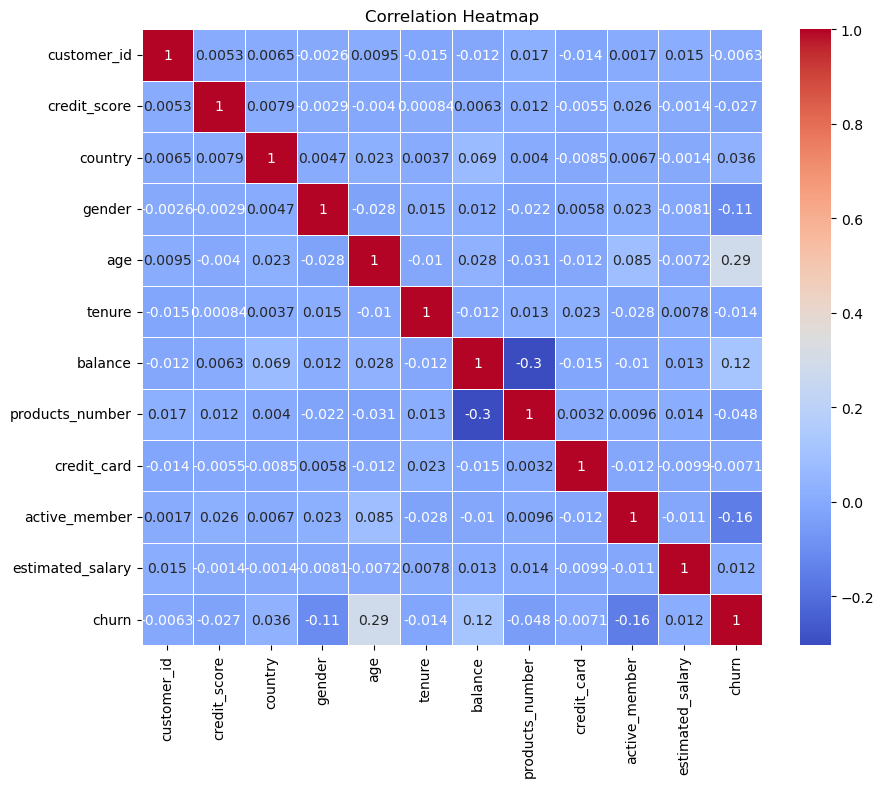

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 4. EDA

### 4.1 Percentage Distributioin 

In [45]:
values = df['churn'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 79.63
percentage of 1 : 20.369999999999997


In [22]:
# df.drop(['customer_id','country'],axis = 1, inplace = True)

In [23]:
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


## 5. Modelling

In [46]:
X = df.drop(['churn'],axis=1)
y = df['churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [48]:
X_train.shape

(8000, 11)

In [49]:
X_test.shape

(2000, 11)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit( X_train, y_train)

LogisticRegression()

In [53]:
y_pred = lr.predict(X_test)

In [32]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, y_pred)
print("Logistic Regression Accuracy: ", lr_accuracy)
print("Logistic Regression Precision: ", lr_precision)
print("Logistic Regression Recall: ", lr_recall)
print("Logistic Regression F1 Score: ", lr_f1)
print("Logistic Regression AUC: ", lr_auc)

Logistic Regression Accuracy:  0.799
Logistic Regression Precision:  0.32727272727272727
Logistic Regression Recall:  0.04699738903394256
Logistic Regression F1 Score:  0.0821917808219178
Logistic Regression AUC:  0.5120577545046028
